İmportlar:

In [271]:
!pip -q install stanza
!pip -q install trnlp
!pip -q install networkx
from nltk import ngrams
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import stanza
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
nltk.download("punkt_tab")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stanza.download('tr')
from nltk.tokenize import word_tokenize ,sent_tokenize
from trnlp import TrnlpWord

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


1) En az 300 kelime içeren bir Türkçe metin bulunuz.


In [272]:
text= """Kişisel Verilerin İşlenmesi

Genel ilkeler

MADDE 4- (1) Kişisel veriler, ancak bu Kanunda ve diğer kanunlarda öngörülen usul ve esaslara uygun olarak işlenebilir.

(2) Kişisel verilerin işlenmesinde aşağıdaki ilkelere uyulması zorunludur:

a) Hukuka ve dürüstlük kurallarına uygun olma.

b) Doğru ve gerektiğinde güncel olma.

c) Belirli, açık ve meşru amaçlar için işlenme.

ç) İşlendikleri amaçla bağlantılı, sınırlı ve ölçülü olma.

d) İlgili mevzuatta öngörülen veya işlendikleri amaç için gerekli olan süre kadar muhafaza edilme.



Kişisel verilerin işlenme şartları

MADDE 5- (1) Kişisel veriler ilgili kişinin açık rızası olmaksızın işlenemez.

(2) Aşağıdaki şartlardan birinin varlığı hâlinde, ilgili kişinin açık rızası aranmaksızın kişisel verilerinin işlenmesi mümkündür:

a) Kanunlarda açıkça öngörülmesi.

b) Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan veya rızasına hukuki geçerlilik tanınmayan kişinin kendisinin ya da bir başkasının hayatı veya beden bütünlüğünün korunması için zorunlu olması.

c) Bir sözleşmenin kurulması veya ifasıyla doğrudan doğruya ilgili olması kaydıyla, sözleşmenin taraflarına ait kişisel verilerin işlenmesinin gerekli olması.

ç) Veri sorumlusunun hukuki yükümlülüğünü yerine getirebilmesi için zorunlu olması.

d) İlgili kişinin kendisi tarafından alenileştirilmiş olması.

e) Bir hakkın tesisi, kullanılması veya korunması için veri işlemenin zorunlu olması.

f) İlgili kişinin temel hak ve özgürlüklerine zarar vermemek kaydıyla, veri sorumlusunun meşru menfaatleri için veri işlenmesinin zorunlu olması.



Özel nitelikli kişisel verilerin işlenme şartları

MADDE 6- (1) Kişilerin ırkı, etnik kökeni, siyasi düşüncesi, felsefi inancı, dini, mezhebi veya diğer inançları, kılık ve kıyafeti, dernek, vakıf ya da sendika üyeliği, sağlığı, cinsel hayatı, ceza mahkûmiyeti ve güvenlik tedbirleriyle ilgili verileri ile biyometrik ve genetik verileri özel nitelikli kişisel veridir.

(2) (Mülga:2/3/2024-7499/33 md.)

(3) (Değişik:2/3/2024-7499/33 md.) Özel nitelikli kişisel verilerin işlenmesi yasaktır. Ancak bu verilerin işlenmesi;

a) İlgili kişinin açık rızasının olması,

b) Kanunlarda açıkça öngörülmesi,

c) Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan veya rızasına hukuki geçerlilik tanınmayan kişinin, kendisinin ya da bir başkasının hayatı veya beden bütünlüğünün korunması için zorunlu olması,

ç) İlgili kişinin alenileştirdiği kişisel verilere ilişkin ve alenileştirme iradesine uygun olması,

d) Bir hakkın tesisi, kullanılması veya korunması için zorunlu olması,

e) Sır saklama yükümlülüğü altında bulunan kişiler veya yetkili kurum ve kuruluşlarca, kamu sağlığının korunması, koruyucu hekimlik, tıbbi teşhis, tedavi ve bakım hizmetlerinin yürütülmesi ile sağlık hizmetlerinin planlanması, yönetimi ve finansmanı amacıyla gerekli olması,

f) İstihdam, iş sağlığı ve güvenliği, sosyal güvenlik, sosyal hizmetler ve sosyal yardım alanlarındaki hukuki yükümlülüklerin yerine getirilmesi için zorunlu olması,

g) Siyasi, felsefi, dini veya sendikal amaçlarla kurulan vakıf, dernek ve diğer kâr amacı gütmeyen kuruluş ya da oluşumların, tâbi oldukları mevzuata ve amaçlarına uygun olmak, faaliyet alanlarıyla sınırlı olmak ve üçüncü kişilere açıklanmamak kaydıyla; mevcut veya eski üyelerine ve mensuplarına veyahut bu kuruluş ve oluşumlarla düzenli olarak temasta olan kişilere yönelik olması,

halinde mümkündür.

(4) Özel nitelikli kişisel verilerin işlenmesinde, ayrıca Kurul tarafından belirlenen yeterli önlemlerin alınması şarttır."""

2) Bu metin üzerinde önişleme adımlarını gerçekleştiriniz.


In [273]:
text_clean = re.sub(r'\([^)]*\)', '', text)  #parantezler
text_clean = re.sub(r'(?m)^\s*([0-9]+|[a-zçğıöşüA-ZÇĞİÖŞÜ])\)\s*', '', text_clean) # a) gibi kısımlar için
text_clean = text_clean.replace('\n', ' ')
text_clean = re.sub(r'\s+', ' ', text_clean).strip()
text_clean = re.sub(r'[ \t]+', ' ', text_clean).strip() # çok boşluklar
print(text_clean)

Kişisel Verilerin İşlenmesi Genel ilkeler MADDE 4- Kişisel veriler, ancak bu Kanunda ve diğer kanunlarda öngörülen usul ve esaslara uygun olarak işlenebilir. Kişisel verilerin işlenmesinde aşağıdaki ilkelere uyulması zorunludur: Hukuka ve dürüstlük kurallarına uygun olma. Doğru ve gerektiğinde güncel olma. Belirli, açık ve meşru amaçlar için işlenme. İşlendikleri amaçla bağlantılı, sınırlı ve ölçülü olma. İlgili mevzuatta öngörülen veya işlendikleri amaç için gerekli olan süre kadar muhafaza edilme. Kişisel verilerin işlenme şartları MADDE 5- Kişisel veriler ilgili kişinin açık rızası olmaksızın işlenemez. Aşağıdaki şartlardan birinin varlığı hâlinde, ilgili kişinin açık rızası aranmaksızın kişisel verilerinin işlenmesi mümkündür: Kanunlarda açıkça öngörülmesi. Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan veya rızasına hukuki geçerlilik tanınmayan kişinin kendisinin ya da bir başkasının hayatı veya beden bütünlüğünün korunması için zorunlu olması. Bir sözleşmeni

In [274]:
stop_words= set(stopwords.words("turkish"))
nlp = stanza.Pipeline('tr', processors='tokenize,pos,lemma')
doc= nlp(text_clean)
sentences = []
for sent in doc.sentences:
  tok_words = [w.text for w in sent.words]
  no_stop = [w for w in tok_words if w.lower() not in stop_words]
  no_stop_lemma = [(w.lemma or w.text) for w in sent.words if w.text.lower() not in stop_words] #hata verdiği için w.text ekledim

  sentence_no_stop = " ".join(no_stop)
  sentence_with_stop = " ".join(tok_words)
  no_stop_lemma_sentence = " ".join(no_stop_lemma)

  sentences.append({
      "original_sentence": sent.text.strip() ,
      "original_sentence_tokens": sentence_with_stop,
      "no_stop_sentence": sentence_no_stop,
      "no_stop_lemma_sentence":no_stop_lemma_sentence})

df_sent = pd.DataFrame(sentences)
display(df_sent.head(10))



,original_sentence,original_sentence_tokens,no_stop_sentence,no_stop_lemma_sentence
0,"Kişisel Verilerin İşlenmesi Genel ilkeler MADDE 4- Kişisel veriler, ancak bu Kanunda ve diğer kanunlarda öngörülen usul ve esaslara uygun olarak işlenebilir.","Kişisel Verilerin İşlenmesi Genel ilkeler MADDE 4 - Kişisel veriler , ancak bu Kanunda ve diğer kanunlarda öngörülen usul ve esaslara uygun olarak işlenebilir .","Kişisel Verilerin İşlenmesi Genel ilkeler MADDE 4 - Kişisel veriler , ancak Kanunda diğer kanunlarda öngörülen usul esaslara uygun olarak işlenebilir .","kişisel veri işle genel ilke MADDE 4 - kişisel veri , ancak kanun diğer kanun öngör usul esas uygun olarak işle ."
1,Kişisel verilerin işlenmesinde aşağıdaki ilkelere uyulması zorunludur: Hukuka ve dürüstlük kurallarına uygun olma.,Kişisel verilerin işlenmesinde aşağıda ki ilkelere uyulması zorun lu dur : Hukuka ve dürüstlük kurallarına uygun olma .,Kişisel verilerin işlenmesinde aşağıda ilkelere uyulması zorun lu dur : Hukuka dürüstlük kurallarına uygun olma .,kişisel veri işle aşağı ilke uyul zorun li i : hukuka dürüstlük kural uygun ol .
2,Doğru ve gerektiğinde güncel olma.,Doğru ve gerektiğinde güncel olma .,Doğru gerektiğinde güncel olma .,doğru gerek güncel ol .
3,"Belirli, açık ve meşru amaçlar için işlenme.","Belirli , açık ve meşru amaçlar için işlenme .","Belirli , açık meşru amaçlar işlenme .","belirli , açık meşru amaç işle ."
4,"İşlendikleri amaçla bağlantılı, sınırlı ve ölçülü olma.","İşlendikleri amaçla bağlantılı , sınırlı ve ölçülü olma .","İşlendikleri amaçla bağlantılı , sınırlı ölçülü olma .","işle amaç bağlantılı , sınırlı ölçülü ol ."
5,İlgili mevzuatta öngörülen veya işlendikleri amaç için gerekli olan süre kadar muhafaza edilme.,İlgi li mevzuatta öngörülen veya işlendikleri amaç için gerekli olan süre kadar muhafaza edilme .,İlgi li mevzuatta öngörülen işlendikleri amaç gerekli olan süre kadar muhafaza edilme .,ilgi li mevzuat öngör işle amaç gerekli ol süre kadar muhafaza et .
6,Kişisel verilerin işlenme şartları MADDE 5- Kişisel veriler ilgili kişinin açık rızası olmaksızın işlenemez.,Kişisel verilerin işlenme şartları MADDE 5 - Kişisel veriler ilgili kişinin açık rızası olmaksızın işlenemez .,Kişisel verilerin işlenme şartları MADDE 5 - Kişisel veriler ilgili kişinin açık rızası olmaksızın işlenemez .,kişisel veri işle şart MADDE lira - kişisel veri ilgili kişi açık rıza ol işle .
7,"Aşağıdaki şartlardan birinin varlığı hâlinde, ilgili kişinin açık rızası aranmaksızın kişisel verilerinin işlenmesi mümkündür: Kanunlarda açıkça öngörülmesi.","Aşağıda ki şartlardan birinin varlığı hâlinde , ilgili kişinin açık rızası aranmaksızın kişisel verilerinin işlenmesi mümkündür : Kanunlarda açıkça öngörülmesi .","Aşağıda şartlardan birinin varlığı hâlinde , ilgili kişinin açık rızası aranmaksızın kişisel verilerinin işlenmesi mümkündür : Kanunlarda açıkça öngörülmesi .","aşağı şart biri varlık hâl , ilgili kişi açık rıza ara kişisel veri işle mümkün : kanun açıkça öngör ."
8,Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan veya rızasına hukuki geçerlilik tanınmayan kişinin kendisinin ya da bir başkasının hayatı veya beden bütünlüğünün korunması için zorunlu olması.,Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan veya rızasına hukuki geçerlilik tanınmayan kişinin kendisinin ya da bir başkasının hayatı veya beden bütünlüğünün korunması için zorun lu olması .,Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan rızasına hukuki geçerlilik tanınmayan kişinin kendisinin bir başkasının hayatı beden bütünlüğünün korunması zorun lu olması .,fiili imkânsızlık neden rıza açıkla durum bul rıza hukuki geçerlilik tanı kişi kendi bir başka hayat beden bütünlük korun zorun li ol .
9,"Bir sözleşmenin kurulması veya ifasıyla doğrudan doğruya ilgili olması kaydıyla, sözleşmenin taraflarına ait kişisel verilerin işlenmesinin gerekli olması.","Bir sözleşmenin kurulması veya ifasıyla doğrudan doğruya ilgili olması kaydıyla ,

3) TF-IDF hesaplamasını yapınız ve en yüksek 10 kelimeyi listeleyiniz.


In [275]:

def tfidf10(df,col):
  df=  df.copy()
  df[col] =df[col].str.replace("İ", "i").str.replace("I", "ı")
  tfidf_vectorizer = TfidfVectorizer()
  X_tfidf = tfidf_vectorizer.fit_transform(df[col])
  features_names = tfidf_vectorizer.get_feature_names_out()
  sums = np.asarray(X_tfidf.sum(axis=0)).ravel()
  df_scores = pd.DataFrame({"Kelime": features_names, "Toplam TF-IDF": sums})

  df_scores_sorted = df_scores.sort_values("Toplam TF-IDF", ascending=False)
  print(f"\n===== EN YÜKSEK 10 KELİME (Toplam TF-IDF): {col} =====")
  display(df_scores_sorted.head(10))




In [276]:
for col in df_sent.columns:
  tfidf10(df_sent,col)



===== EN YÜKSEK 10 KELİME (Toplam TF-IDF): original_sentence =====


,Kelime,Toplam TF-IDF
180,ve,1.998534
109,kişisel,1.674844
143,olması,1.620964
88,için,1.325002
189,veya,1.234808
79,ilgili,1.230227
186,verilerin,1.220796
108,kişinin,1.149504
181,veri,1.061970
204,zorunlu,1.007632



===== EN YÜKSEK 10 KELİME (Toplam TF-IDF): original_sentence_tokens =====


,Kelime,Toplam TF-IDF
189,ve,1.972863
114,kişisel,1.603564
151,olması,1.583095
92,için,1.306597
129,li,1.298322
197,veya,1.215735
194,verilerin,1.155691
113,kişinin,1.112144
130,lu,1.106532
212,zorun,1.106532



===== EN YÜKSEK 10 KELİME (Toplam TF-IDF): no_stop_sentence =====


,Kelime,Toplam TF-IDF
146,olması,1.670122
109,kişisel,1.648059
124,li,1.331825
188,verilerin,1.185208
125,lu,1.175288
204,zorun,1.175288
108,kişinin,1.156183
184,veri,1.099109
143,olma,1.008201
79,ilgi,0.885689



===== EN YÜKSEK 10 KELİME (Toplam TF-IDF): no_stop_lemma_sentence =====


,Kelime,Toplam TF-IDF
104,ol,2.390244
136,veri,2.362333
70,işle,2.166626
90,li,2.113064
77,kişisel,1.821925
76,kişi,1.393384
148,zorun,1.286541
5,amaç,1.269074
108,rıza,1.037347
60,ilgi,0.985250


4) Cümleleri ve cümlelerdeki kelime sayısını listeleyiniz.

In [277]:
def showsentences(df,col):
  df_show = df[[col]].copy()
  df_show[f"{col}: Cümelelerdeki Kelime Sayısı"]= df_show[col].apply(lambda x: len(x.split()))
  print(f"{col}: Cümle sayısı: {df.shape[0]}")
  display(df_show)
  return df_show


In [278]:
for col in df_sent.columns:
  showsentences(df_sent,col)


original_sentence: Cümle sayısı: 18


,original_sentence,original_sentence: Cümelelerdeki Kelime Sayısı
0,"Kişisel Verilerin İşlenmesi Genel ilkeler MADDE 4- Kişisel veriler, ancak bu Kanunda ve diğer kanunlarda öngörülen usul ve esaslara uygun olarak işlenebilir.",22
1,Kişisel verilerin işlenmesinde aşağıdaki ilkelere uyulması zorunludur: Hukuka ve dürüstlük kurallarına uygun olma.,13
2,Doğru ve gerektiğinde güncel olma.,5
3,"Belirli, açık ve meşru amaçlar için işlenme.",7
4,"İşlendikleri amaçla bağlantılı, sınırlı ve ölçülü olma.",7
5,İlgili mevzuatta öngörülen veya işlendikleri amaç için gerekli olan süre kadar muhafaza edilme.,13
6,Kişisel verilerin işlenme şartları MADDE 5- Kişisel veriler ilgili kişinin açık rızası olmaksızın işlenemez.,14
7,"Aşağıdaki şartlardan birinin varlığı hâlinde, ilgili kişinin açık rızası aranmaksızın kişisel verilerinin işlenmesi mümkündür: Kanunlarda açıkça öngörülmesi.",17
8,Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan veya rızasına hukuki geçerlilik tanınmayan kişinin kendisinin ya da bir başkasının hayatı veya beden bütünlüğünün korunması için zorunlu olması.,26
9,"Bir sözleşmenin kurulması veya ifasıyla doğrudan doğruya ilgili olması kaydıyla, sözleşmenin taraflarına ait kişisel verilerin işlenmesinin gerekli olması.",18


original_sentence_tokens: Cümle sayısı: 18


,original_sentence_tokens,original_sentence_tokens: Cümelelerdeki Kelime Sayısı
0,"Kişisel Verilerin İşlenmesi Genel ilkeler MADDE 4 - Kişisel veriler , ancak bu Kanunda ve diğer kanunlarda öngörülen usul ve esaslara uygun olarak işlenebilir .",25
1,Kişisel verilerin işlenmesinde aşağıda ki ilkelere uyulması zorun lu dur : Hukuka ve dürüstlük kurallarına uygun olma .,18
2,Doğru ve gerektiğinde güncel olma .,6
3,"Belirli , açık ve meşru amaçlar için işlenme .",9
4,"İşlendikleri amaçla bağlantılı , sınırlı ve ölçülü olma .",9
5,İlgi li mevzuatta öngörülen veya işlendikleri amaç için gerekli olan süre kadar muhafaza edilme .,15
6,Kişisel verilerin işlenme şartları MADDE 5 - Kişisel veriler ilgili kişinin açık rızası olmaksızın işlenemez .,16
7,"Aşağıda ki şartlardan birinin varlığı hâlinde , ilgili kişinin açık rızası aranmaksızın kişisel verilerinin işlenmesi mümkündür : Kanunlarda açıkça öngörülmesi .",21
8,Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan veya rızasına hukuki geçerlilik tanınmayan kişinin kendisinin ya da bir başkasının hayatı veya beden bütünlüğünün korunması için zorun lu olması .,28
9,"Bir sözleşmenin kurulması veya ifasıyla doğrudan doğruya ilgili olması kaydıyla , sözleşmenin taraflarına ait kişisel verilerin işlenmesinin gerekli olması .",20


no_stop_sentence: Cümle sayısı: 18


,no_stop_sentence,no_stop_sentence: Cümelelerdeki Kelime Sayısı
0,"Kişisel Verilerin İşlenmesi Genel ilkeler MADDE 4 - Kişisel veriler , ancak Kanunda diğer kanunlarda öngörülen usul esaslara uygun olarak işlenebilir .",22
1,Kişisel verilerin işlenmesinde aşağıda ilkelere uyulması zorun lu dur : Hukuka dürüstlük kurallarına uygun olma .,16
2,Doğru gerektiğinde güncel olma .,5
3,"Belirli , açık meşru amaçlar işlenme .",7
4,"İşlendikleri amaçla bağlantılı , sınırlı ölçülü olma .",8
5,İlgi li mevzuatta öngörülen işlendikleri amaç gerekli olan süre kadar muhafaza edilme .,13
6,Kişisel verilerin işlenme şartları MADDE 5 - Kişisel veriler ilgili kişinin açık rızası olmaksızın işlenemez .,16
7,"Aşağıda şartlardan birinin varlığı hâlinde , ilgili kişinin açık rızası aranmaksızın kişisel verilerinin işlenmesi mümkündür : Kanunlarda açıkça öngörülmesi .",20
8,Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan rızasına hukuki geçerlilik tanınmayan kişinin kendisinin bir başkasının hayatı beden bütünlüğünün korunması zorun lu olması .,23
9,"Bir sözleşmenin kurulması ifasıyla doğrudan doğruya ilgili olması kaydıyla , sözleşmenin taraflarına ait kişisel verilerin işlenmesinin gerekli olması .",19


no_stop_lemma_sentence: Cümle sayısı: 18


,no_stop_lemma_sentence,no_stop_lemma_sentence: Cümelelerdeki Kelime Sayısı
0,"kişisel veri işle genel ilke MADDE 4 - kişisel veri , ancak kanun diğer kanun öngör usul esas uygun olarak işle .",22
1,kişisel veri işle aşağı ilke uyul zorun li i : hukuka dürüstlük kural uygun ol .,16
2,doğru gerek güncel ol .,5
3,"belirli , açık meşru amaç işle .",7
4,"işle amaç bağlantılı , sınırlı ölçülü ol .",8
5,ilgi li mevzuat öngör işle amaç gerekli ol süre kadar muhafaza et .,13
6,kişisel veri işle şart MADDE lira - kişisel veri ilgili kişi açık rıza ol işle .,16
7,"aşağı şart biri varlık hâl , ilgili kişi açık rıza ara kişisel veri işle mümkün : kanun açıkça öngör .",20
8,fiili imkânsızlık neden rıza açıkla durum bul rıza hukuki geçerlilik tanı kişi kendi bir başka hayat beden bütünlük korun zorun li ol .,23
9,"bir sözleşme kur ifa doğru doğru ilgili ol kayıt , sözleşme taraf ait kişisel veri işle gerekli ol .",19



5) Bu metindeki benzersiz kelime sayısını hesaplayınız.

In [279]:
def uniquewords(df,col):
  all_sentences = " ".join(df[col].astype(str)).lower()
  all_words = re.findall(r"\b[a-zçğıöşü0-9]+\b", all_sentences)
  print(f"{col}:Benzersiz Kelime sayısı: {len(set(all_words))}")

In [280]:
for col in df_sent.columns:
  uniquewords(df_sent,col)


original_sentence:Benzersiz Kelime sayısı: 221
original_sentence_tokens:Benzersiz Kelime sayısı: 227
no_stop_sentence:Benzersiz Kelime sayısı: 219
no_stop_lemma_sentence:Benzersiz Kelime sayısı: 157



6) Her cümleye POS tagging uygulayınız (istediğiniz bir kütüphane ile)

In [281]:
stanza_tags = [(w.text,w.upos) for s in doc.sentences for w in s.words]
print(stanza_tags)


[('Kişisel', 'ADJ'), ('Verilerin', 'NOUN'), ('İşlenmesi', 'VERB'), ('Genel', 'ADJ'), ('ilkeler', 'NOUN'), ('MADDE', 'NOUN'), ('4', 'NOUN'), ('-', 'PUNCT'), ('Kişisel', 'ADJ'), ('veriler', 'NOUN'), (',', 'PUNCT'), ('ancak', 'ADV'), ('bu', 'DET'), ('Kanunda', 'NOUN'), ('ve', 'CCONJ'), ('diğer', 'ADJ'), ('kanunlarda', 'NOUN'), ('öngörülen', 'VERB'), ('usul', 'NOUN'), ('ve', 'CCONJ'), ('esaslara', 'NOUN'), ('uygun', 'ADJ'), ('olarak', 'ADP'), ('işlenebilir', 'VERB'), ('.', 'PUNCT'), ('Kişisel', 'ADJ'), ('verilerin', 'NOUN'), ('işlenmesinde', 'VERB'), ('aşağıda', 'ADJ'), ('ki', 'ADP'), ('ilkelere', 'NOUN'), ('uyulması', 'VERB'), ('zorun', 'NOUN'), ('lu', 'ADP'), ('dur', 'AUX'), (':', 'PUNCT'), ('Hukuka', 'NOUN'), ('ve', 'CCONJ'), ('dürüstlük', 'NOUN'), ('kurallarına', 'NOUN'), ('uygun', 'ADJ'), ('olma', 'VERB'), ('.', 'PUNCT'), ('Doğru', 'ADJ'), ('ve', 'CCONJ'), ('gerektiğinde', 'VERB'), ('güncel', 'ADJ'), ('olma', 'VERB'), ('.', 'PUNCT'), ('Belirli', 'ADJ'), (',', 'PUNCT'), ('açık', 'ADJ')

In [282]:
pos_map = {
    "isim" : "NOUN",
    "fiil" : "VERB",
    "sıfat": "ADJ",
    "zarf" : "ADV",
    "ünlem" : "INTJ",
    "zamir": "PRON",
    "edat" : "ADP",
    "bağlaç" : "CCONJ",
    "sayı" : "NUM",
    "özel": "PROPN",
    "noktalama" : "PUNCT",
    "bilinmeyen" : "X",
    "isim,sıfat" : "NOUN,ADJ",
    "sıfat,zarf": "ADJ,ADV",
    "isim,fiil" : "NOUN,VERB"

}
def trnlp_pos_tag(text):
    tokens = re.findall(r"\w+|[^\w\s]", text, re.UNICODE)
    results = []
    for token in tokens:
        tw = TrnlpWord()
        tw.setword(token)
        results.append((token, pos_map.get(tw.get_base_type, "X")))
    return results

nlp_pos = stanza.Pipeline(
    'tr',
    processors='tokenize,pos',
    tokenize_no_ssplit=True,
    verbose=False
)


In [283]:
def compare_pos(sentences):
    trnlp_tags = trnlp_pos_tag(sentences)
    doc_sentence = nlp_pos(sentences)
    stanza_tags = [(w.text, w.upos) for s in doc_sentence.sentences for w in s.words]
    max_len = min(len(trnlp_tags), len(stanza_tags))

    df = pd.DataFrame({
      "Kelime": [trnlp_tags[i][0] for i in range(max_len)],
      "Stanza_POS": [stanza_tags[i][1] for i in range(max_len)],
      "TRNLP_POS": [trnlp_tags[i][1] for i in range(max_len)]
    })
    df["Aynı_mı?"] = df.apply(lambda x: x["Stanza_POS"] in x["TRNLP_POS"].split(","), axis=1)
    display(df)
    return df

pos_tables = df_sent["original_sentence"].apply(compare_pos)



,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Kişisel,ADJ,PROPN,False
1,Verilerin,NOUN,NOUN,True
2,İşlenmesi,VERB,NOUN,False
3,Genel,ADJ,VERB,False
4,ilkeler,NOUN,NOUN,True
5,MADDE,NOUN,NOUN,True
6,4,NOUN,X,False
7,-,PUNCT,X,False
8,Kişisel,ADJ,PROPN,False
9,veriler,NOUN,NOUN,True


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Kişisel,ADJ,PROPN,False
1,verilerin,NOUN,NOUN,True
2,işlenmesinde,VERB,NOUN,False
3,aşağıdaki,ADJ,X,False
4,ilkelere,ADP,NOUN,False
5,uyulması,NOUN,VERB,False
6,zorunludur,VERB,NOUN,False
7,:,NOUN,X,False
8,Hukuka,ADP,NOUN,False
9,ve,AUX,CCONJ,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Doğru,ADJ,PROPN,False
1,ve,CCONJ,CCONJ,True
2,gerektiğinde,VERB,VERB,True
3,güncel,ADJ,ADJ,True
4,olma,VERB,VERB,True
5,.,PUNCT,X,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Belirli,ADJ,ADJ,True
1,",",PUNCT,X,False
2,açık,ADJ,VERB,False
3,ve,CCONJ,CCONJ,True
4,meşru,ADJ,ADJ,True
5,amaçlar,NOUN,NOUN,True
6,için,ADP,ADP,True
7,işlenme,VERB,NOUN,False
8,.,PUNCT,X,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,İşlendikleri,VERB,NOUN,False
1,amaçla,NOUN,NOUN,True
2,bağlantılı,ADJ,NOUN,False
3,",",PUNCT,X,False
4,sınırlı,ADJ,NOUN,False
5,ve,CCONJ,CCONJ,True
6,ölçülü,ADJ,NOUN,False
7,olma,VERB,VERB,True
8,.,PUNCT,X,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,İlgili,ADJ,PROPN,False
1,mevzuatta,NOUN,NOUN,True
2,öngörülen,VERB,NOUN,False
3,veya,CCONJ,CCONJ,True
4,işlendikleri,VERB,NOUN,False
5,amaç,NOUN,NOUN,True
6,için,ADP,ADP,True
7,gerekli,ADJ,"NOUN,ADJ",True
8,olan,VERB,VERB,True
9,süre,NOUN,NOUN,True


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Kişisel,ADJ,PROPN,False
1,verilerin,NOUN,NOUN,True
2,işlenme,VERB,NOUN,False
3,şartları,NOUN,NOUN,True
4,MADDE,NOUN,NOUN,True
5,5,NOUN,X,False
6,-,PUNCT,X,False
7,Kişisel,ADJ,PROPN,False
8,veriler,NOUN,NOUN,True
9,ilgili,ADJ,NOUN,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Aşağıdaki,ADJ,X,False
1,şartlardan,ADP,NOUN,False
2,birinin,NOUN,PRON,False
3,varlığı,PRON,"NOUN,ADJ",False
4,hâlinde,NOUN,NOUN,True
5,",",NOUN,X,False
6,ilgili,PUNCT,NOUN,False
7,kişinin,ADJ,NOUN,False
8,açık,NOUN,VERB,False
9,rızası,ADJ,NOUN,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Fiili,ADJ,ADJ,True
1,imkânsızlık,NOUN,NOUN,True
2,nedeniyle,NOUN,ADV,False
3,rızasını,NOUN,NOUN,True
4,açıklayamayacak,VERB,VERB,True
5,durumda,NOUN,VERB,False
6,bulunan,VERB,VERB,True
7,veya,CCONJ,CCONJ,True
8,rızasına,NOUN,NOUN,True
9,hukuki,ADJ,ADJ,True


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Bir,DET,X,False
1,sözleşmenin,NOUN,NOUN,True
2,kurulması,VERB,"NOUN,ADJ",False
3,veya,CCONJ,CCONJ,True
4,ifasıyla,NOUN,NOUN,True
5,doğrudan,ADV,"ADJ,ADV",True
6,doğruya,ADJ,X,False
7,ilgili,ADJ,NOUN,False
8,olması,VERB,VERB,True
9,kaydıyla,NOUN,NOUN,True


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Veri,NOUN,NOUN,True
1,sorumlusunun,NOUN,VERB,False
2,hukuki,ADJ,ADJ,True
3,yükümlülüğünü,NOUN,NOUN,True
4,yerine,NOUN,X,False
5,getirebilmesi,VERB,VERB,True
6,için,ADP,ADP,True
7,zorunlu,NOUN,NOUN,True
8,olması,ADP,VERB,False
9,.,VERB,X,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,İlgili,ADJ,PROPN,False
1,kişinin,NOUN,NOUN,True
2,kendisi,PRON,PRON,True
3,tarafından,NOUN,ADV,False
4,alenileştirilmiş,VERB,ADJ,False
5,olması,VERB,VERB,True
6,.,PUNCT,X,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Bir,DET,X,False
1,hakkın,NOUN,"NOUN,ADJ",True
2,tesisi,NOUN,NOUN,True
3,",",PUNCT,X,False
4,kullanılması,VERB,VERB,True
5,veya,CCONJ,CCONJ,True
6,korunması,VERB,VERB,True
7,için,ADP,ADP,True
8,veri,NOUN,NOUN,True
9,işlemenin,VERB,NOUN,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,İlgili,ADJ,PROPN,False
1,kişinin,NOUN,NOUN,True
2,temel,ADJ,"NOUN,ADJ",True
3,hak,NOUN,"NOUN,ADJ",True
4,ve,CCONJ,CCONJ,True
5,özgürlüklerine,NOUN,ADJ,False
6,zarar,NOUN,NOUN,True
7,vermemek,VERB,VERB,True
8,kaydıyla,NOUN,NOUN,True
9,",",PUNCT,X,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Özel,ADJ,PROPN,False
1,nitelikli,NOUN,NOUN,True
2,kişisel,ADP,NOUN,False
3,verilerin,ADJ,NOUN,False
4,işlenme,NOUN,NOUN,True
5,şartları,VERB,NOUN,False
6,MADDE,NOUN,NOUN,True
7,6,NOUN,X,False
8,-,NOUN,X,False
9,Kişilerin,PUNCT,PROPN,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Özel,ADJ,PROPN,False
1,nitelikli,NOUN,NOUN,True
2,kişisel,ADP,NOUN,False
3,verilerin,ADJ,NOUN,False
4,işlenmesi,NOUN,NOUN,True
5,yasaktır,VERB,"NOUN,ADJ",False
6,.,ADJ,X,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Ancak,CCONJ,X,False
1,bu,DET,X,False
2,verilerin,NOUN,NOUN,True
3,işlenmesi,VERB,NOUN,False
4,;,PUNCT,X,False
5,İlgili,NOUN,PROPN,False
6,kişinin,ADP,NOUN,False
7,açık,NOUN,VERB,False
8,rızasının,ADJ,NOUN,False
9,olması,NOUN,VERB,False


,Kelime,Stanza_POS,TRNLP_POS,Aynı_mı?
0,Özel,ADJ,PROPN,False
1,nitelikli,NOUN,NOUN,True
2,kişisel,ADP,NOUN,False
3,verilerin,ADJ,NOUN,False
4,işlenmesinde,NOUN,NOUN,True
5,",",VERB,X,False
6,ayrıca,PUNCT,"ADJ,ADV",False
7,Kurul,ADV,"NOUN,ADJ",False
8,tarafından,NOUN,ADV,False
9,belirlenen,NOUN,VERB,False



7) Cümlelerdeki dependency (bağımlılık) şemalarını oluşturunuz. (her cümle ayrı şekil)


============ Cümle 1: Kişisel Verilerin İşlenmesi Genel ilkeler MADDE 4- Kişisel veriler, ancak bu Kanunda ve diğer kanunlarda öngörülen usul ve esaslara uygun olarak işlenebilir. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Kişisel,kişisel,ADJ,Verilerin,amod
1,2,Verilerin,veri,NOUN,İşlenmesi,nsubj
2,3,İşlenmesi,işle,VERB,ilkeler,nmod:poss
3,4,Genel,genel,ADJ,ilkeler,amod
4,5,ilkeler,ilke,NOUN,işlenebilir,nsubj
5,6,MADDE,MADDE,NOUN,veriler,nmod:poss
6,7,4,4,NOUN,MADDE,flat
7,8,-,-,PUNCT,veriler,punct
8,9,Kişisel,kişisel,ADJ,veriler,amod
9,10,veriler,veri,NOUN,işlenebilir,nsubj


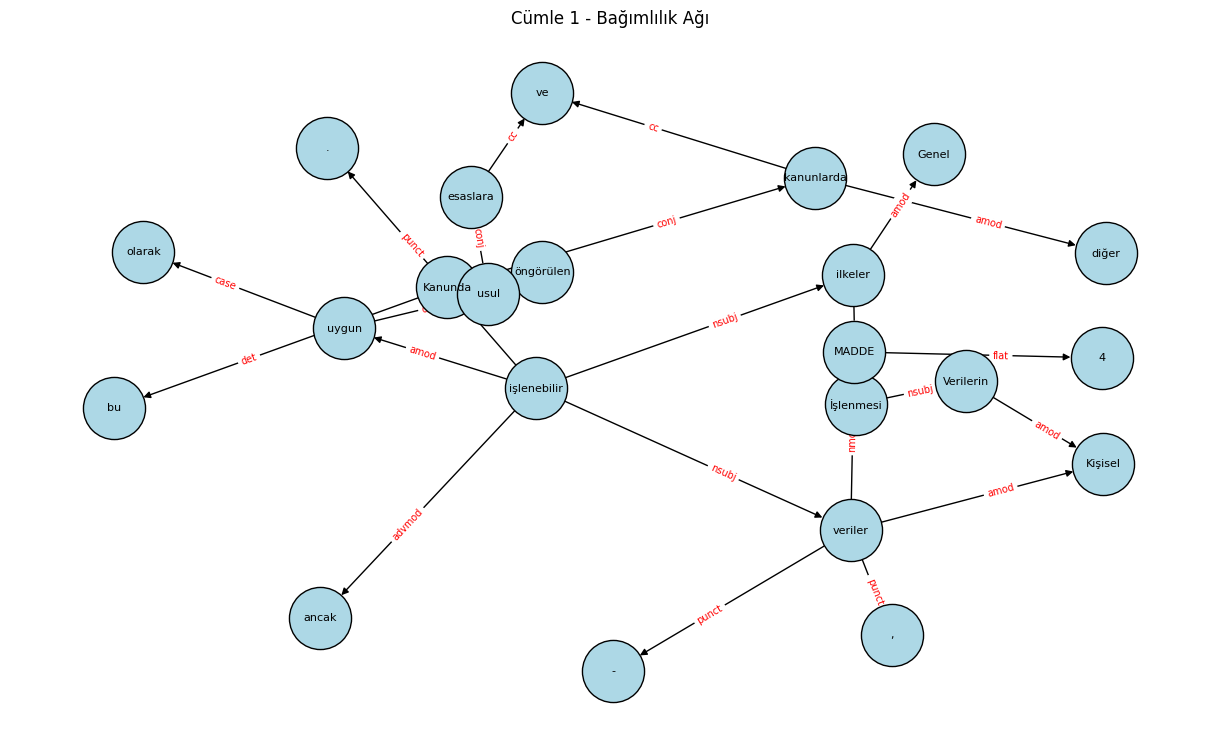


============ Cümle 2: Kişisel verilerin işlenmesinde aşağıdaki ilkelere uyulması zorunludur: Hukuka ve dürüstlük kurallarına uygun olma. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Kişisel,kişisel,ADJ,verilerin,amod
1,2,verilerin,veri,NOUN,işlenmesinde,nmod:poss
2,3,işlenmesinde,işle,VERB,uyulması,advcl
3,4,aşağıda,aşağı,ADJ,ilkelere,amod
4,5,ki,ki,ADP,aşağıda,case
5,6,ilkelere,ilke,NOUN,uyulması,obl
6,7,uyulması,uyul,VERB,zorun,nsubj
7,8,zorun,zorun,NOUN,ROOT,root
8,9,lu,li,ADP,zorun,case
9,10,dur,i,AUX,zorun,cop


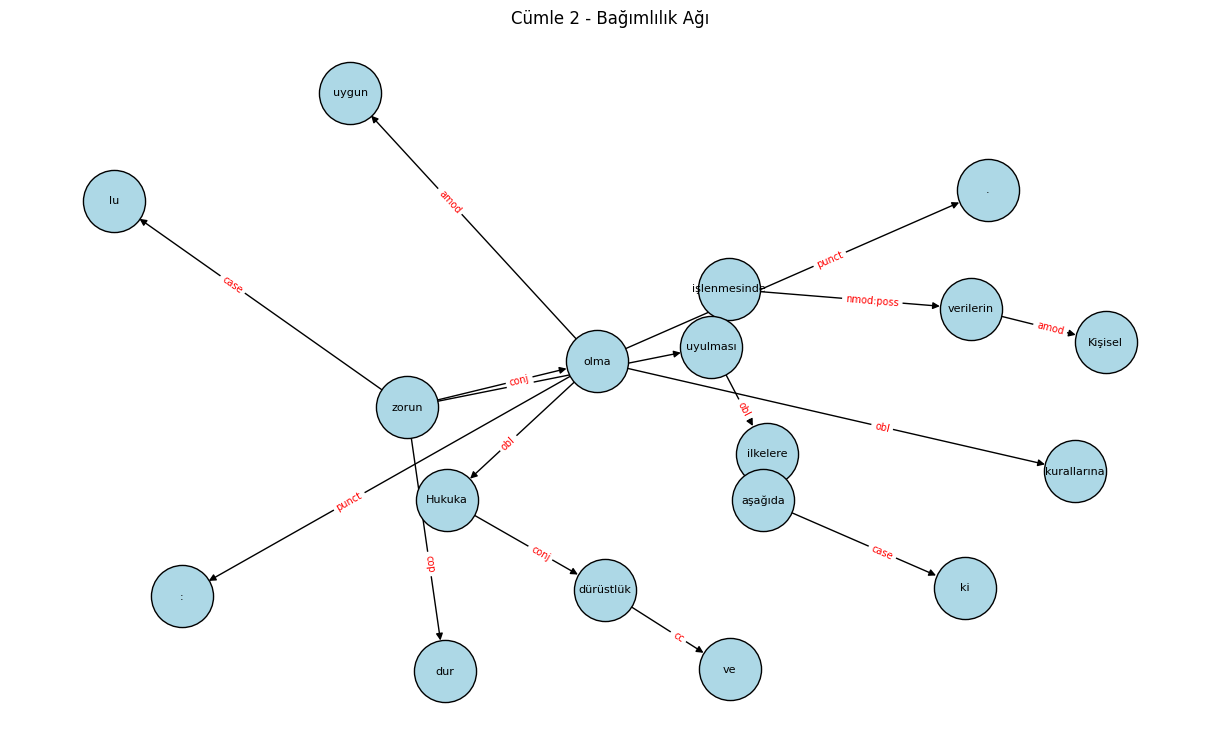


============ Cümle 3: Doğru ve gerektiğinde güncel olma. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Doğru,doğru,ADJ,olma,amod
1,2,ve,ve,CCONJ,gerektiğinde,cc
2,3,gerektiğinde,gerek,VERB,Doğru,conj
3,4,güncel,güncel,ADJ,olma,amod
4,5,olma,ol,VERB,ROOT,root
5,6,.,.,PUNCT,olma,punct


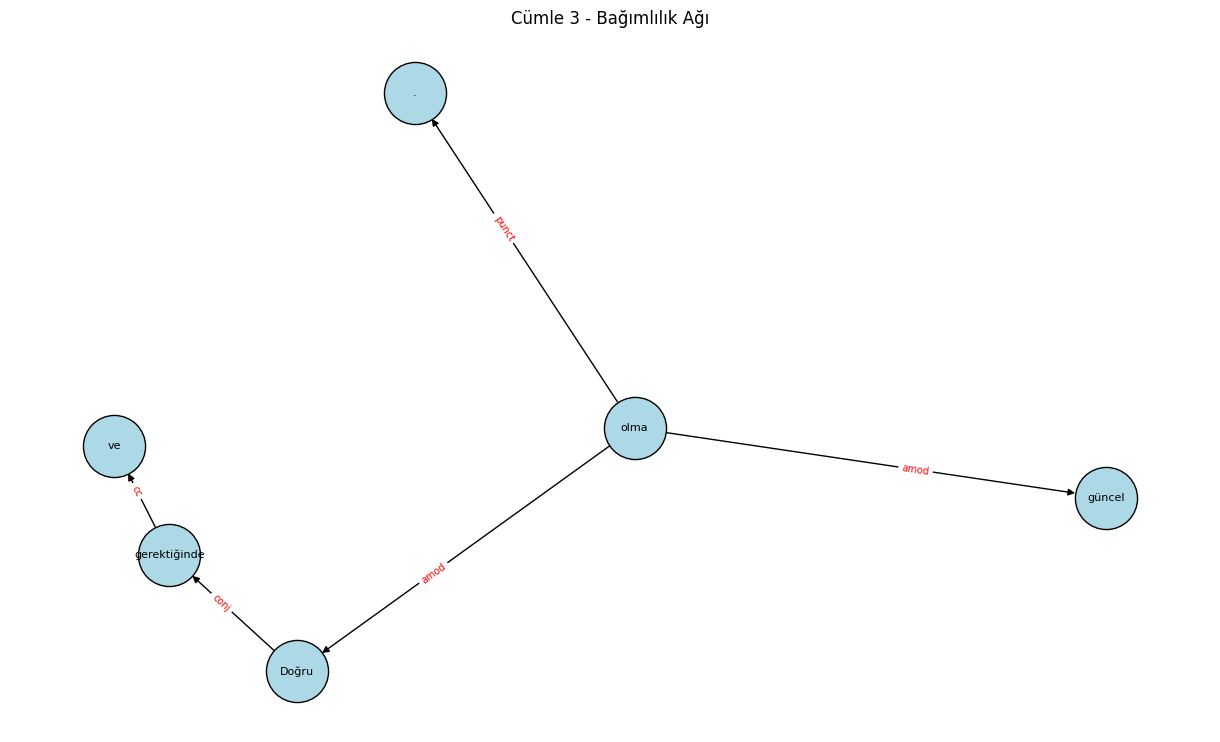


============ Cümle 4: Belirli, açık ve meşru amaçlar için işlenme. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Belirli,belirli,ADJ,amaçlar,amod
1,2,",",",",PUNCT,açık,punct
2,3,açık,açık,ADJ,Belirli,conj
3,4,ve,ve,CCONJ,meşru,cc
4,5,meşru,meşru,ADJ,Belirli,conj
5,6,amaçlar,amaç,NOUN,işlenme,obl
6,7,için,için,ADP,amaçlar,case
7,8,işlenme,işle,VERB,ROOT,root
8,9,.,.,PUNCT,işlenme,punct


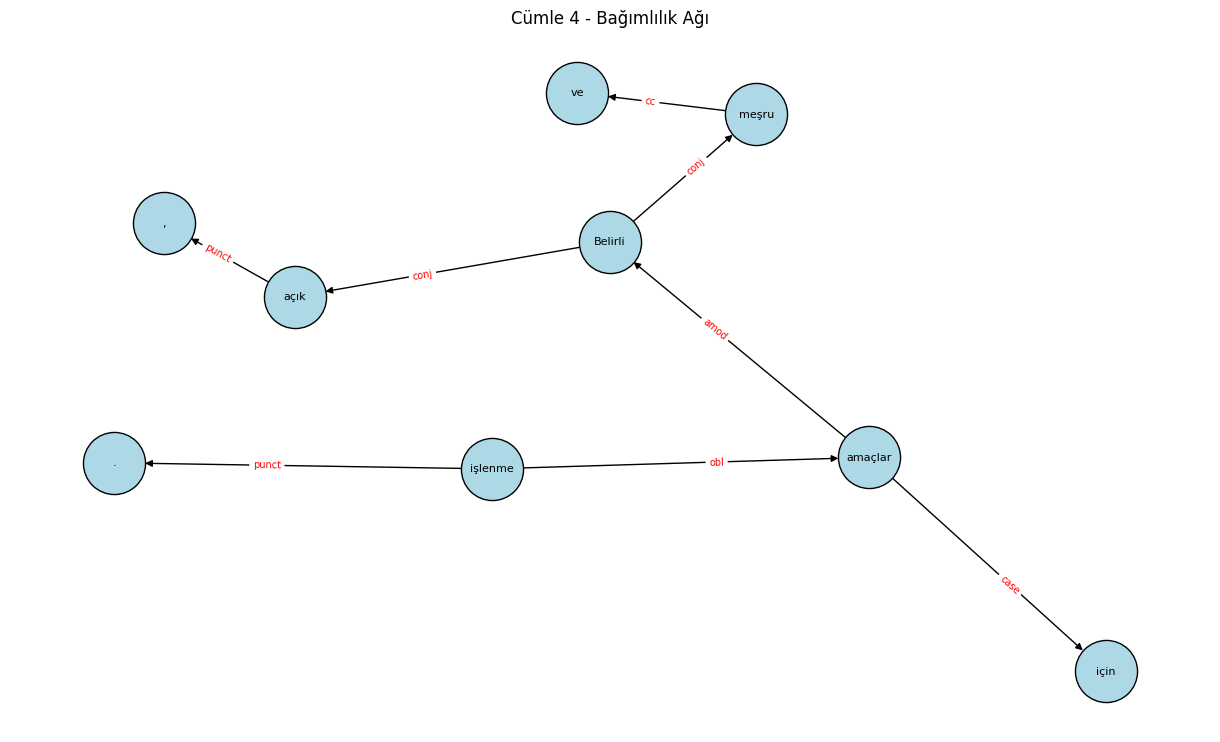


============ Cümle 5: İşlendikleri amaçla bağlantılı, sınırlı ve ölçülü olma. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,İşlendikleri,işle,VERB,amaçla,acl
1,2,amaçla,amaç,NOUN,olma,obl
2,3,bağlantılı,bağlantılı,ADJ,olma,amod
3,4,",",",",PUNCT,sınırlı,punct
4,5,sınırlı,sınırlı,ADJ,bağlantılı,conj
5,6,ve,ve,CCONJ,ölçülü,cc
6,7,ölçülü,ölçülü,ADJ,bağlantılı,conj
7,8,olma,ol,VERB,ROOT,root
8,9,.,.,PUNCT,olma,punct


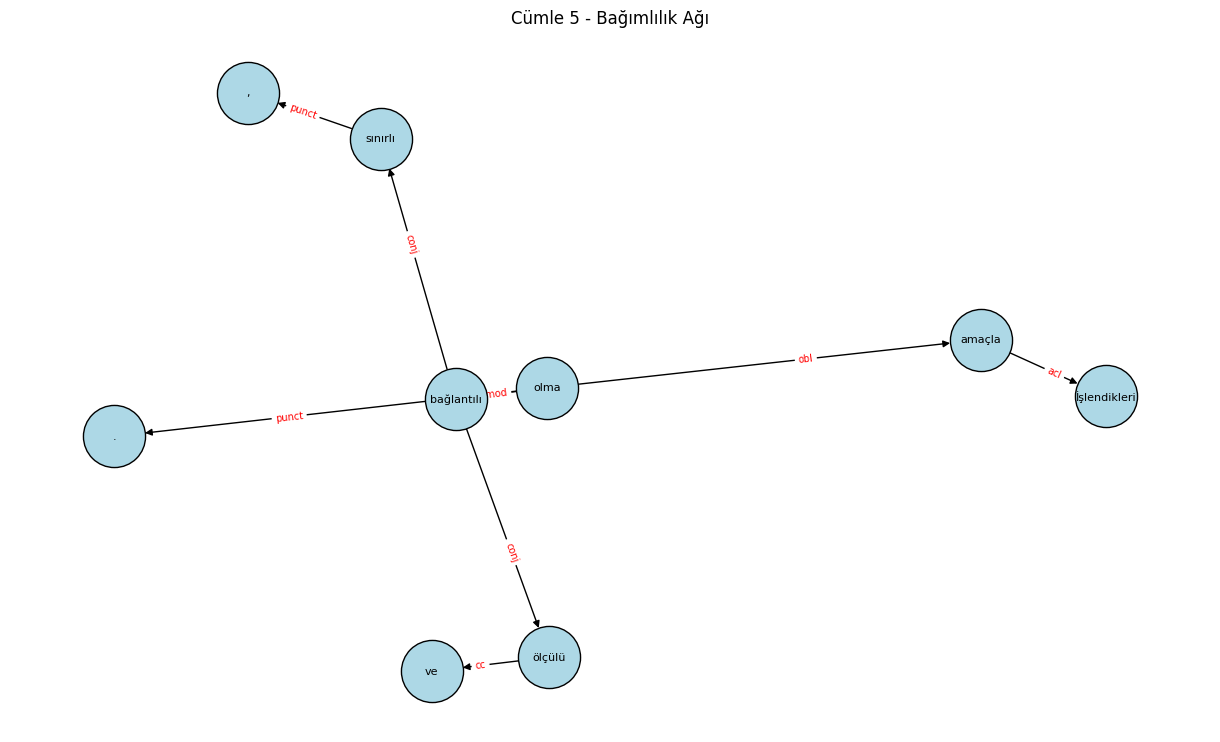


============ Cümle 6: İlgili mevzuatta öngörülen veya işlendikleri amaç için gerekli olan süre kadar muhafaza edilme. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,İlgili,ilgili,ADJ,mevzuatta,amod
1,2,mevzuatta,mevzuat,NOUN,öngörülen,obl
2,3,öngörülen,öngör,VERB,süre,acl
3,4,veya,veya,CCONJ,amaç,cc
4,5,işlendikleri,işle,VERB,amaç,acl
5,6,amaç,amaç,NOUN,öngörülen,conj
6,7,için,için,ADP,amaç,case
7,8,gerekli,gerekli,ADJ,olan,amod
8,9,olan,ol,VERB,süre,acl
9,10,süre,süre,NOUN,muhafaza,nmod


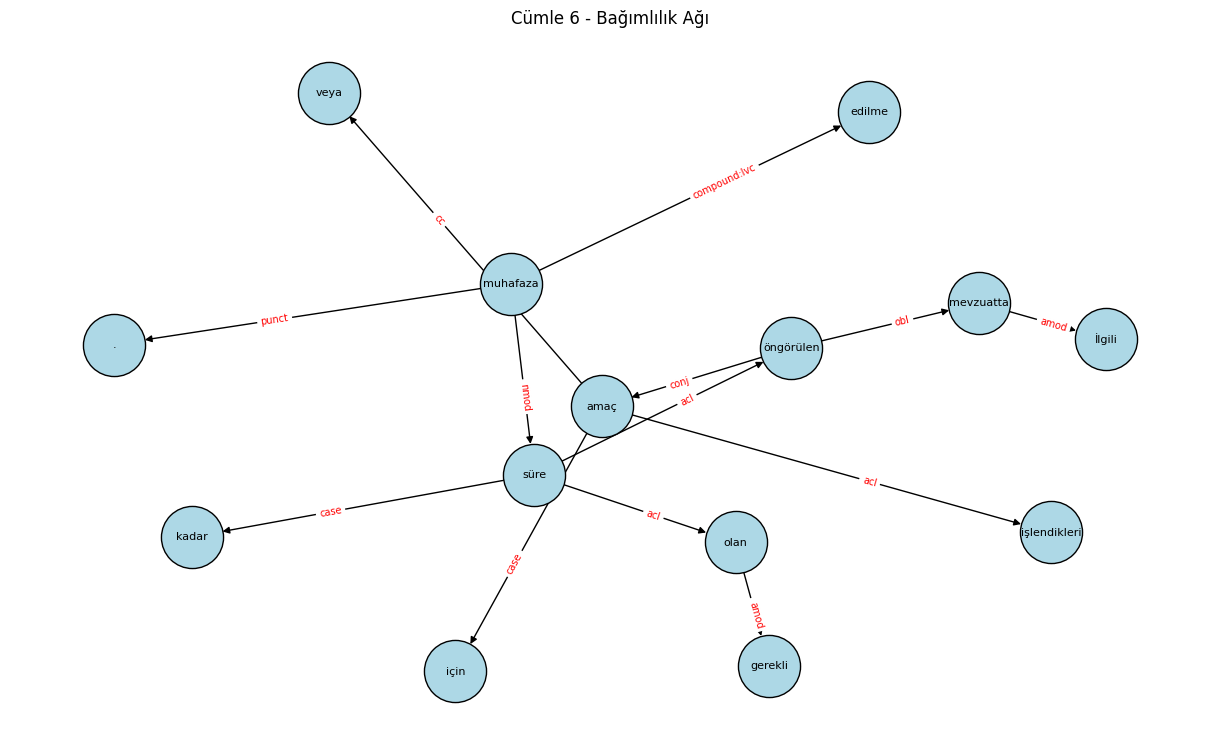


============ Cümle 7: Kişisel verilerin işlenme şartları MADDE 5- Kişisel veriler ilgili kişinin açık rızası olmaksızın işlenemez. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Kişisel,kişisel,ADJ,verilerin,amod
1,2,verilerin,veri,NOUN,şartları,nmod:poss
2,3,işlenme,işle,VERB,şartları,nmod:poss
3,4,şartları,şart,NOUN,işlenemez,nsubj
4,5,MADDE,MADDE,NOUN,veriler,nmod:poss
5,6,5,lira,NOUN,MADDE,flat
6,7,-,-,PUNCT,5,punct
7,8,Kişisel,kişisel,ADJ,veriler,amod
8,9,veriler,veri,NOUN,olmaksızın,nsubj
9,10,ilgili,ilgili,ADJ,kişinin,amod


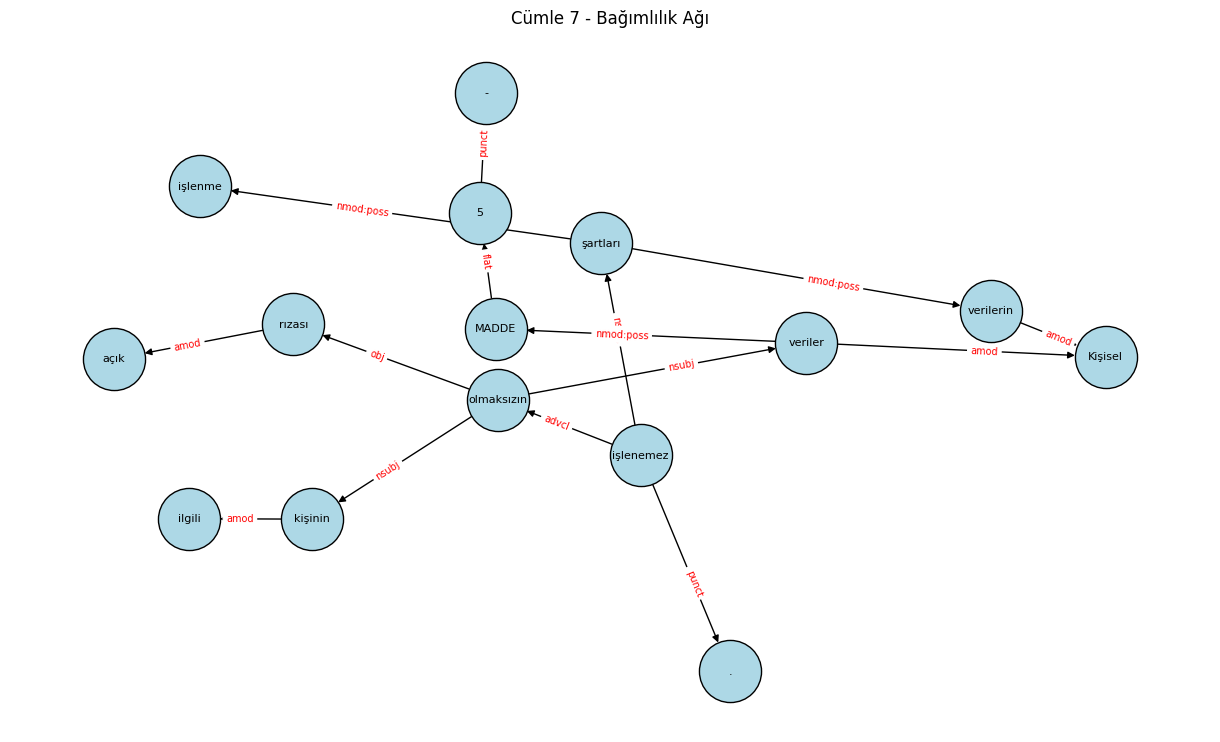


============ Cümle 8: Aşağıdaki şartlardan birinin varlığı hâlinde, ilgili kişinin açık rızası aranmaksızın kişisel verilerinin işlenmesi mümkündür: Kanunlarda açıkça öngörülmesi. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Aşağıda,aşağı,ADJ,birinin,amod
1,2,ki,ki,ADP,Aşağıda,case
2,3,şartlardan,şart,NOUN,birinin,nmod:poss
3,4,birinin,biri,PRON,varlığı,nmod:poss
4,5,varlığı,varlık,NOUN,hâlinde,nmod:poss
5,6,hâlinde,hâl,NOUN,mümkündür,obl
6,7,",",",",PUNCT,mümkündür,punct
7,8,ilgili,ilgili,ADJ,kişinin,amod
8,9,kişinin,kişi,NOUN,rızası,nmod:poss
9,10,açık,açık,ADJ,rızası,amod


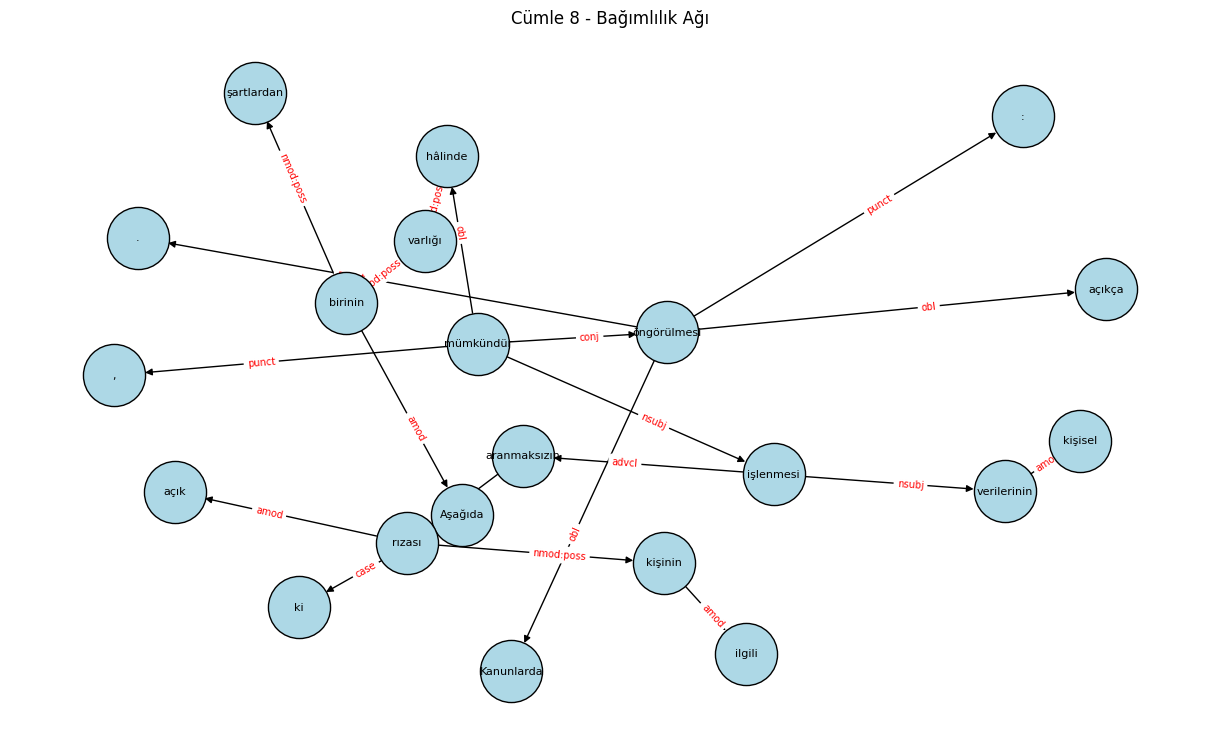


============ Cümle 9: Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan veya rızasına hukuki geçerlilik tanınmayan kişinin kendisinin ya da bir başkasının hayatı veya beden bütünlüğünün korunması için zorunlu olması. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Fiili,fiili,ADJ,nedeniyle,amod
1,2,imkânsızlık,imkânsızlık,NOUN,nedeniyle,nmod:poss
2,3,nedeniyle,neden,NOUN,açıklayamayacak,obl
3,4,rızasını,rıza,NOUN,açıklayamayacak,obj
4,5,açıklayamayacak,açıkla,VERB,durumda,acl
5,6,durumda,durum,NOUN,bulunan,obl
6,7,bulunan,bul,VERB,kişinin,acl
7,8,veya,veya,CCONJ,tanınmayan,cc
8,9,rızasına,rıza,NOUN,tanınmayan,obl
9,10,hukuki,hukuki,ADJ,geçerlilik,amod


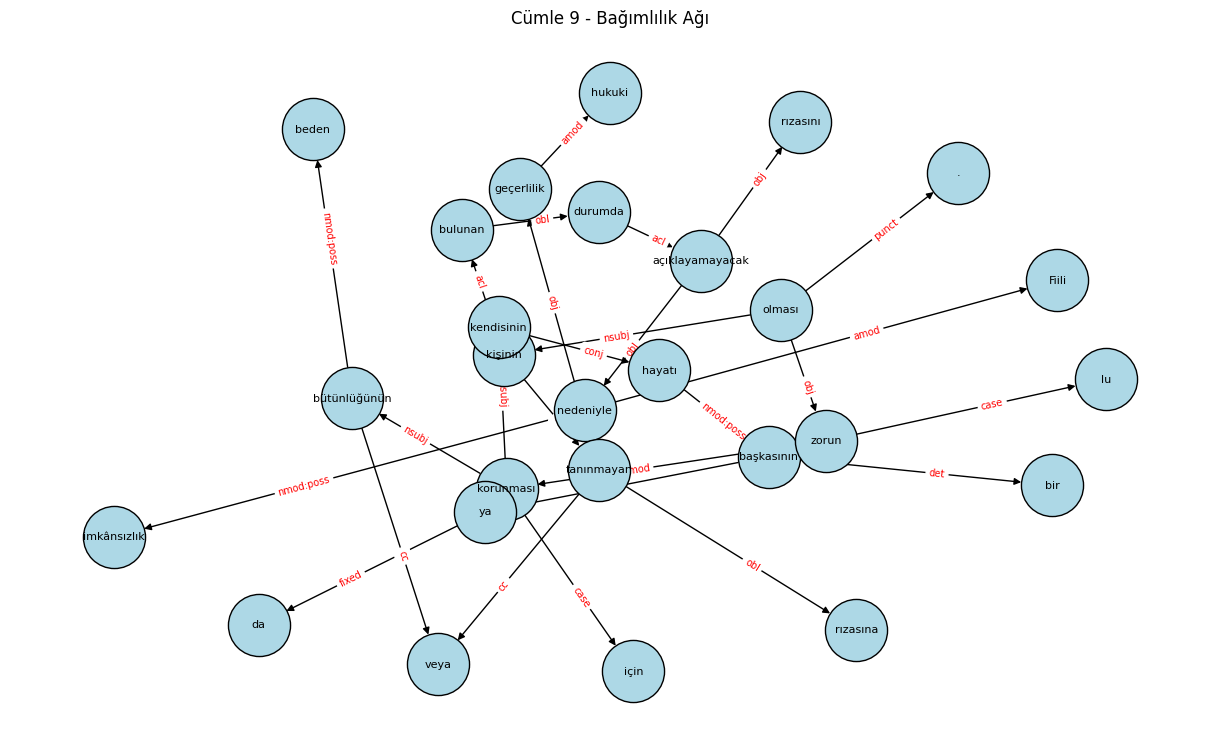


============ Cümle 10: Bir sözleşmenin kurulması veya ifasıyla doğrudan doğruya ilgili olması kaydıyla, sözleşmenin taraflarına ait kişisel verilerin işlenmesinin gerekli olması. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Bir,bir,DET,sözleşmenin,det
1,2,sözleşmenin,sözleşme,NOUN,kurulması,nmod:poss
2,3,kurulması,kur,VERB,olması,nsubj
3,4,veya,veya,CCONJ,ifasıyla,cc
4,5,ifasıyla,ifa,NOUN,kurulması,conj
5,6,doğrudan,doğru,ADV,ilgili,advmod
6,7,doğruya,doğru,ADJ,doğrudan,compound:redup
7,8,ilgili,ilgili,ADJ,olması,amod
8,9,olması,ol,VERB,kaydıyla,nmod:poss
9,10,kaydıyla,kayıt,NOUN,olması,obl


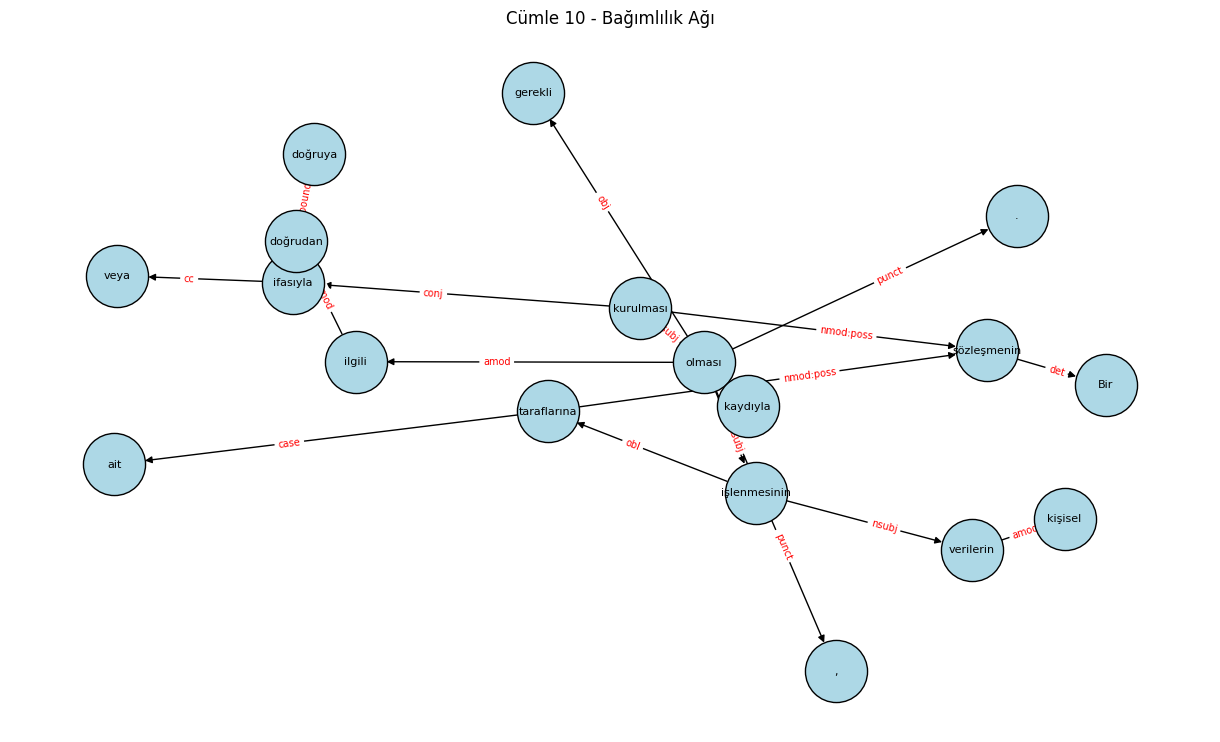


============ Cümle 11: Veri sorumlusunun hukuki yükümlülüğünü yerine getirebilmesi için zorunlu olması. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Veri,veri,NOUN,sorumlusunun,nmod:poss
1,2,sorumlusunun,sorumlu,NOUN,yükümlülüğünü,nmod:poss
2,3,hukuki,hukuki,ADJ,yükümlülüğünü,amod
3,4,yükümlülüğünü,yükümlülük,NOUN,yerine,obj
4,5,yerine,yer,NOUN,olması,advcl
5,6,getirebilmesi,getir,VERB,yerine,compound
6,7,için,için,ADP,yerine,case
7,8,zorun,zorun,NOUN,olması,obj
8,9,lu,li,ADP,zorun,case
9,10,olması,ol,VERB,ROOT,root


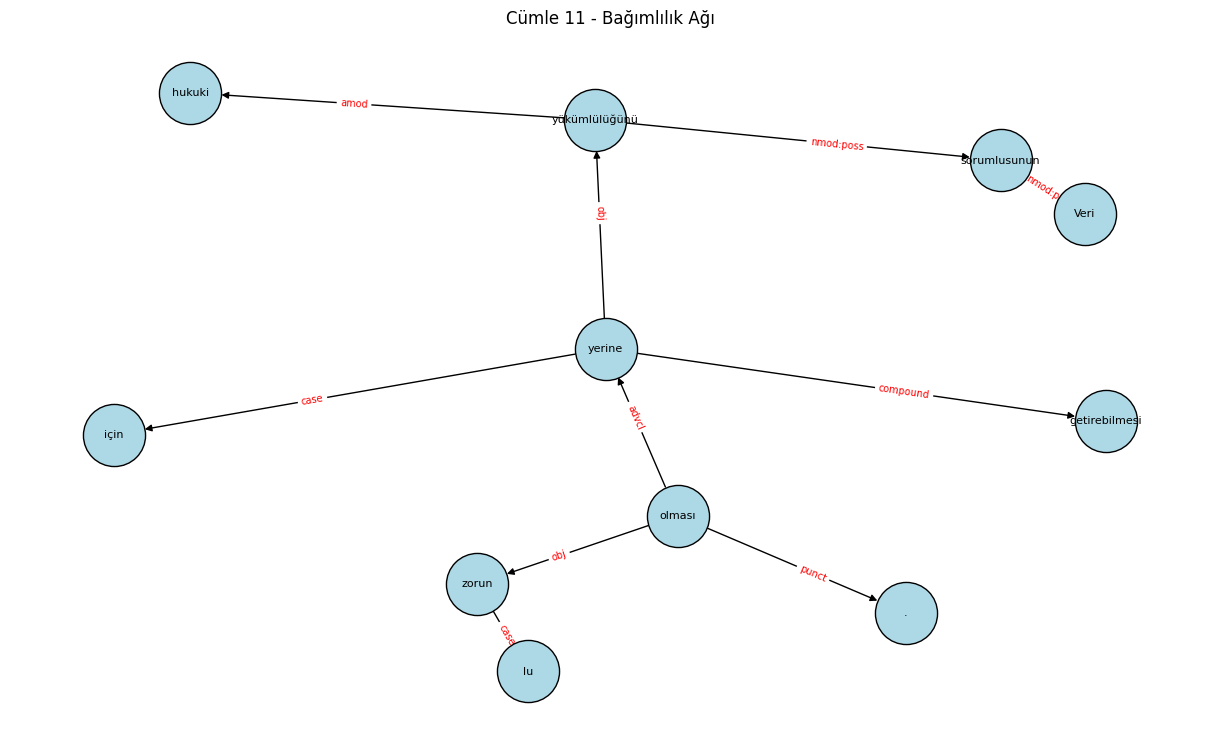


============ Cümle 12: İlgili kişinin kendisi tarafından alenileştirilmiş olması. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,İlgili,ilgili,ADJ,kişinin,amod
1,2,kişinin,kişi,NOUN,alenileştirilmiş,nsubj
2,3,kendisi,kendi,PRON,tarafından,nmod:poss
3,4,tarafından,taraf,NOUN,alenileştirilmiş,obl
4,5,alenileştirilmiş,alenileş,VERB,olması,obj
5,6,olması,ol,VERB,ROOT,root
6,7,.,.,PUNCT,olması,punct


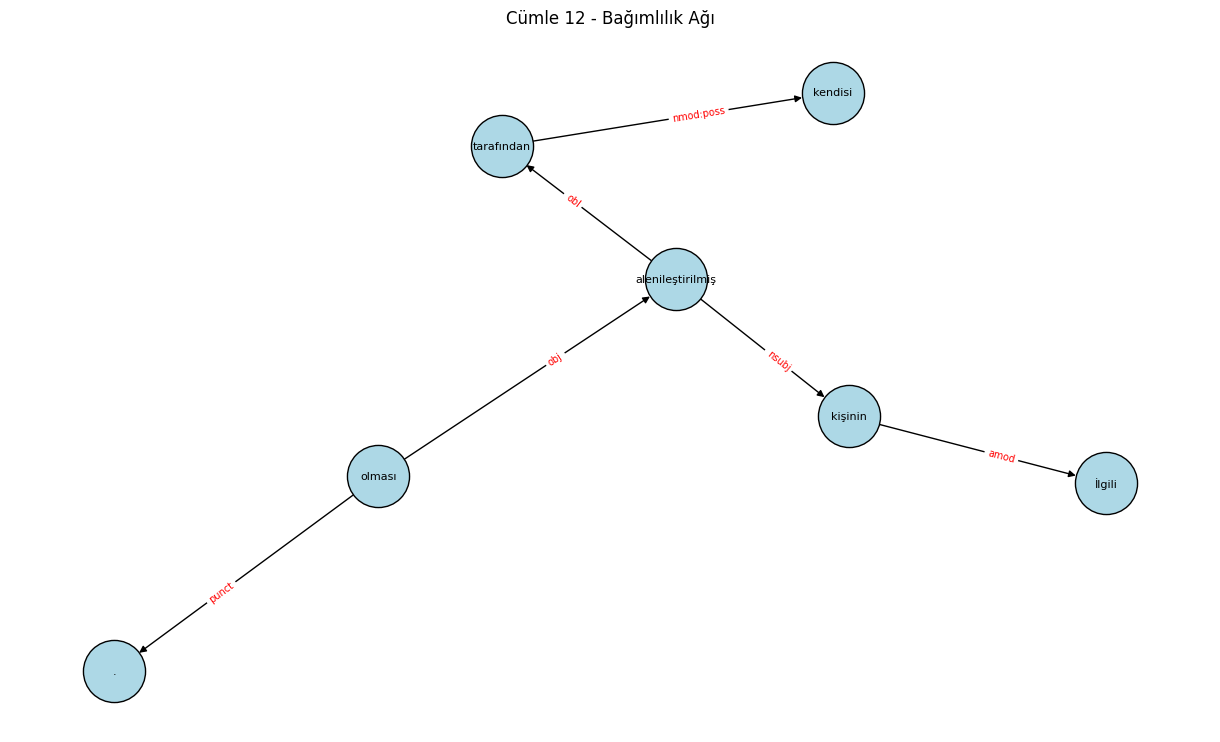


============ Cümle 13: Bir hakkın tesisi, kullanılması veya korunması için veri işlemenin zorunlu olması. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Bir,bir,DET,hakkın,det
1,2,hakkın,hak,NOUN,tesisi,nmod:poss
2,3,tesisi,tesis,NOUN,olması,nsubj
3,4,",",",",PUNCT,kullanılması,punct
4,5,kullanılması,kullan,VERB,tesisi,conj
5,6,veya,veya,CCONJ,korunması,cc
6,7,korunması,korun,VERB,tesisi,conj
7,8,için,için,ADP,kullanılması,case
8,9,veri,veri,NOUN,işlemenin,obj
9,10,işlemenin,işle,VERB,zorun,nsubj


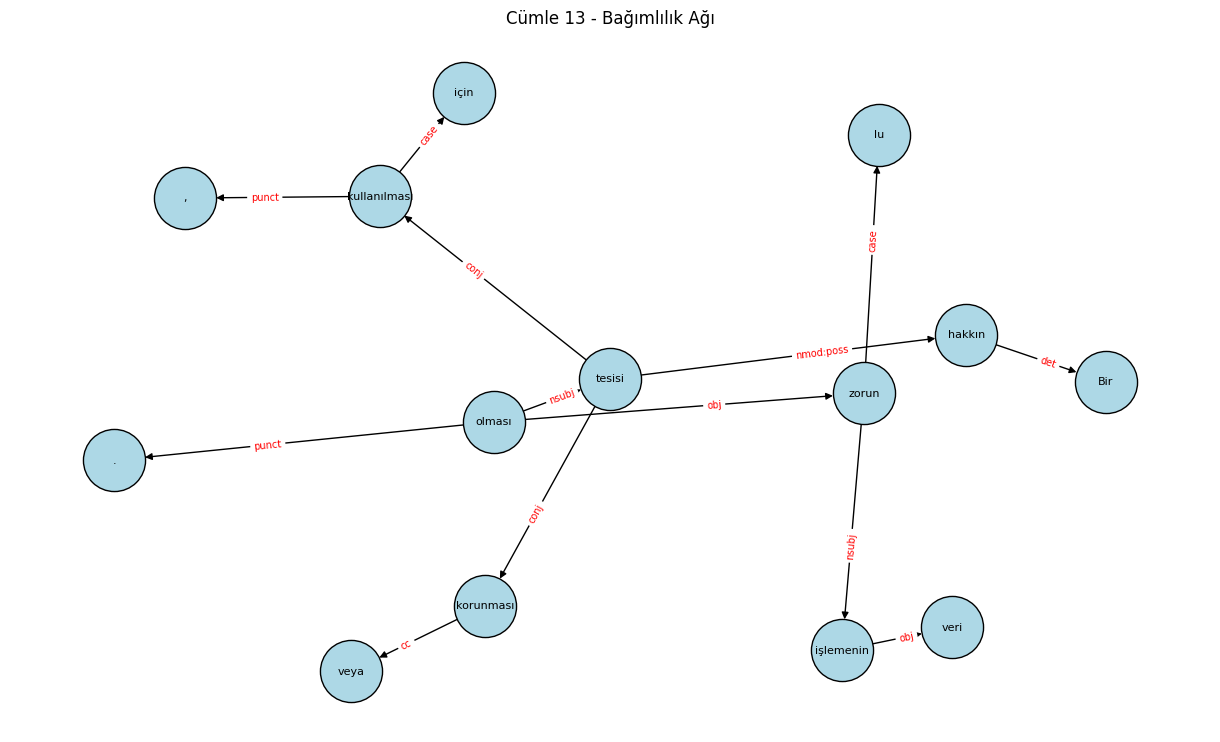


============ Cümle 14: İlgili kişinin temel hak ve özgürlüklerine zarar vermemek kaydıyla, veri sorumlusunun meşru menfaatleri için veri işlenmesinin zorunlu olması. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,İlgili,ilgili,ADJ,kişinin,amod
1,2,kişinin,kişi,NOUN,zarar,nsubj
2,3,temel,temel,ADJ,hak,amod
3,4,hak,hak,NOUN,zarar,nmod
4,5,ve,ve,CCONJ,özgürlüklerine,cc
5,6,özgürlüklerine,özgürlük,NOUN,hak,conj
6,7,zarar,zarar,NOUN,kaydıyla,nmod:poss
7,8,vermemek,ver,VERB,zarar,compound
8,9,kaydıyla,kayıt,NOUN,olması,obl
9,10,",",",",PUNCT,olması,punct


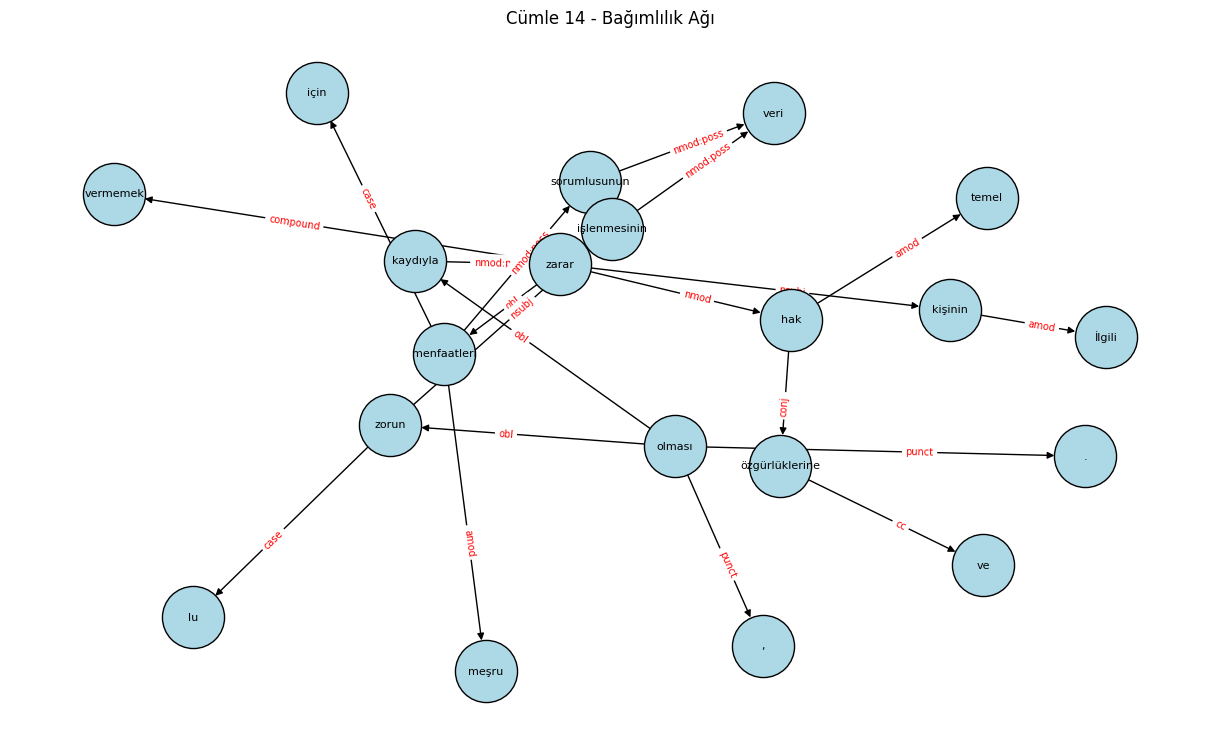


============ Cümle 15: Özel nitelikli kişisel verilerin işlenme şartları MADDE 6- Kişilerin ırkı, etnik kökeni, siyasi düşüncesi, felsefi inancı, dini, mezhebi veya diğer inançları, kılık ve kıyafeti, dernek, vakıf ya da sendika üyeliği, sağlığı, cinsel hayatı, ceza mahkûmiyeti ve güvenlik tedbirleriyle ilgili verileri ile biyometrik ve genetik verileri özel nitelikli kişisel veridir. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Özel,özel,ADJ,nitelik,amod
1,2,nitelik,nitelik,NOUN,verilerin,amod
2,3,li,li,ADP,nitelik,case
3,4,kişisel,kişisel,ADJ,verilerin,amod
4,5,verilerin,veri,NOUN,şartları,nmod:poss
5,6,işlenme,işle,VERB,şartları,nmod:poss
6,7,şartları,şart,NOUN,veri,nsubj
7,8,MADDE,MADDE,NOUN,şartları,nmod:poss
8,9,6,6,NOUN,MADDE,flat
9,10,-,-,PUNCT,ırkı,punct


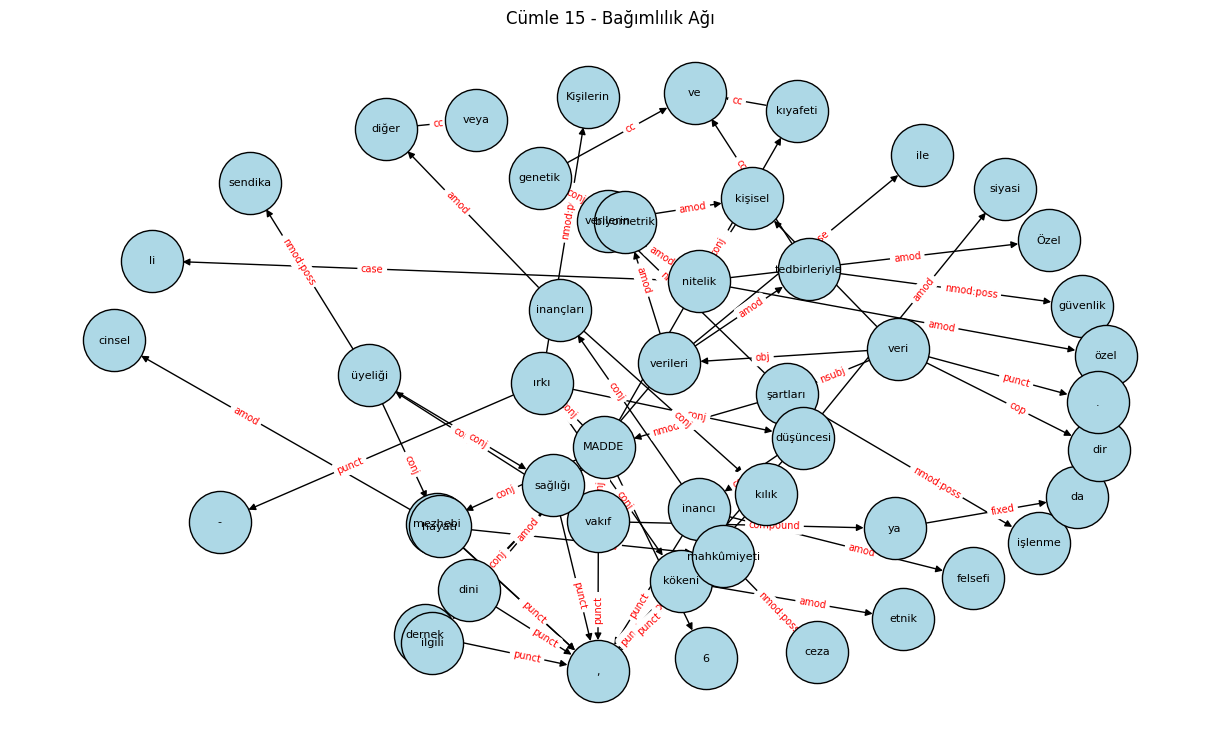


============ Cümle 16: Özel nitelikli kişisel verilerin işlenmesi yasaktır. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Özel,özel,ADJ,nitelik,amod
1,2,nitelik,nitelik,NOUN,verilerin,amod
2,3,li,li,ADP,nitelik,case
3,4,kişisel,kişisel,ADJ,verilerin,amod
4,5,verilerin,veri,NOUN,işlenmesi,nsubj
5,6,işlenmesi,işle,VERB,yasak,nsubj
6,7,yasak,yasak,ADJ,ROOT,root
7,8,tır,i,AUX,yasak,cop
8,9,.,.,PUNCT,yasak,punct


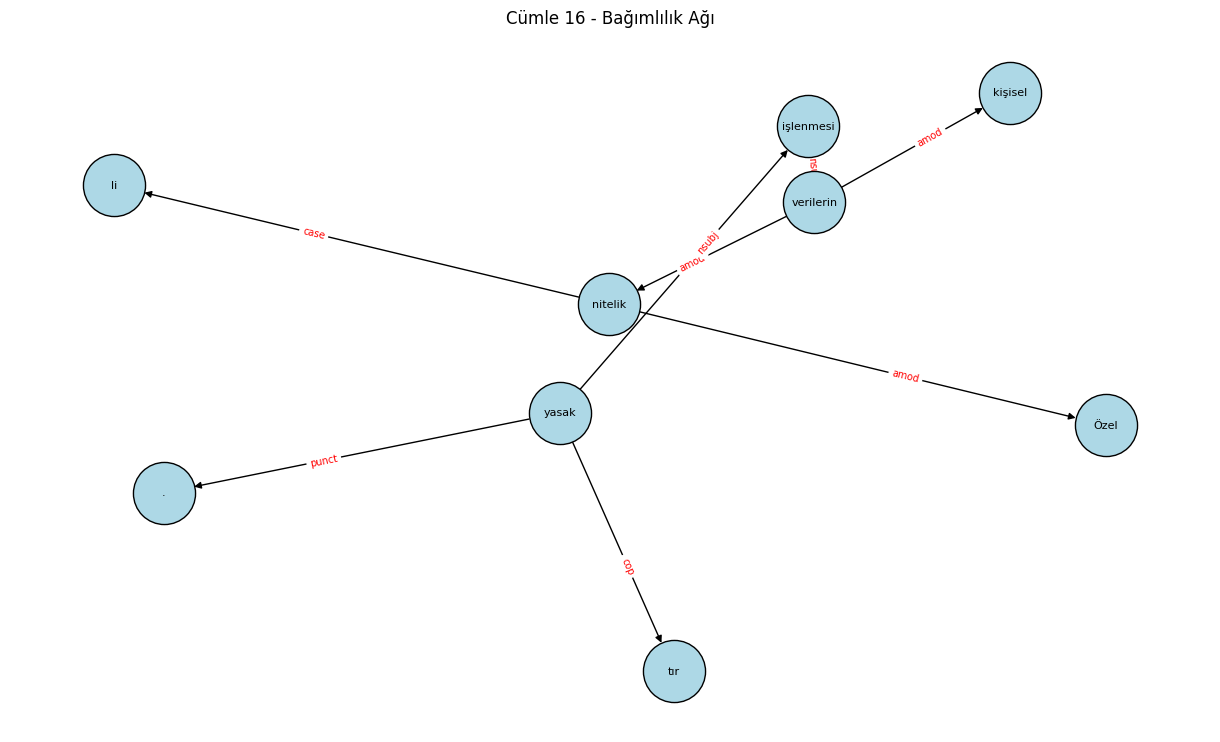


============ Cümle 17: Ancak bu verilerin işlenmesi; İlgili kişinin açık rızasının olması, Kanunlarda açıkça öngörülmesi, Fiili imkânsızlık nedeniyle rızasını açıklayamayacak durumda bulunan veya rızasına hukuki geçerlilik tanınmayan kişinin, kendisinin ya da bir başkasının hayatı veya beden bütünlüğünün korunması için zorunlu olması, İlgili kişinin alenileştirdiği kişisel verilere ilişkin ve alenileştirme iradesine uygun olması, Bir hakkın tesisi, kullanılması veya korunması için zorunlu olması, Sır saklama yükümlülüğü altında bulunan kişiler veya yetkili kurum ve kuruluşlarca, kamu sağlığının korunması, koruyucu hekimlik, tıbbi teşhis, tedavi ve bakım hizmetlerinin yürütülmesi ile sağlık hizmetlerinin planlanması, yönetimi ve finansmanı amacıyla gerekli olması, İstihdam, iş sağlığı ve güvenliği, sosyal güvenlik, sosyal hizmetler ve sosyal yardım alanlarındaki hukuki yükümlülüklerin yerine getirilmesi için zorunlu olması, Siyasi, felsefi, dini veya sendikal amaçlarla kurulan vakıf, d

,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Ancak,ancak,CCONJ,işlenmesi,cc
1,2,bu,bu,DET,verilerin,det
2,3,verilerin,veri,NOUN,işlenmesi,nsubj
3,4,işlenmesi,işle,VERB,durumda,acl
4,5,;,;,PUNCT,işlenmesi,punct
5,6,İlgi,ilgi,NOUN,kişinin,amod
6,7,li,li,ADP,İlgi,case
7,8,kişinin,kişi,NOUN,rızasının,nmod:poss
8,9,açık,açık,ADJ,rızasının,amod
9,10,rızasının,rıza,NOUN,olması,nsubj


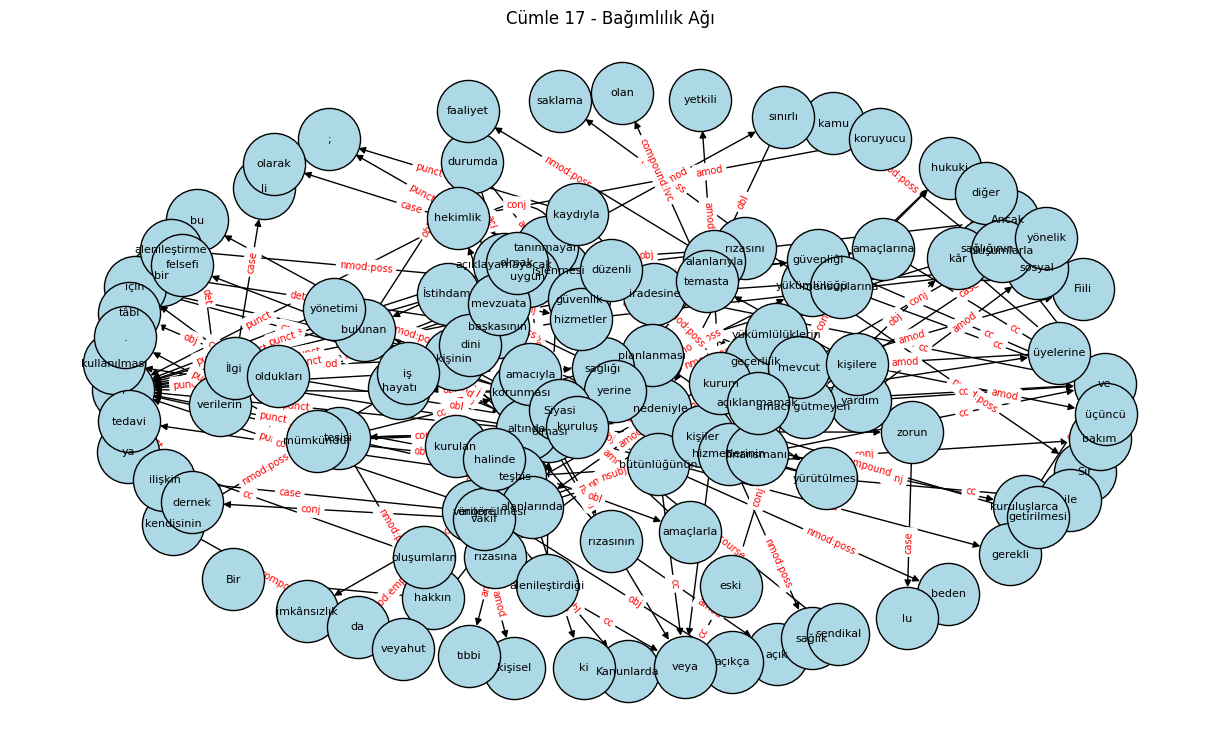


============ Cümle 18: Özel nitelikli kişisel verilerin işlenmesinde, ayrıca Kurul tarafından belirlenen yeterli önlemlerin alınması şarttır. ============



,ID,Söz,Lemma,POS,Baş (head),Bağımlılık türü (deprel)
0,1,Özel,özel,ADJ,nitelik,amod
1,2,nitelik,nitelik,NOUN,verilerin,amod
2,3,li,li,ADP,nitelik,case
3,4,kişisel,kişisel,ADJ,verilerin,amod
4,5,verilerin,veri,NOUN,işlenmesinde,nsubj
5,6,işlenmesinde,işle,VERB,şart,advcl
6,7,",",",",PUNCT,işlenmesinde,punct
7,8,ayrıca,ayrıca,ADV,belirlenen,advmod
8,9,Kurul,kurul,NOUN,tarafından,nmod:poss
9,10,tarafından,taraf,NOUN,belirlenen,obl


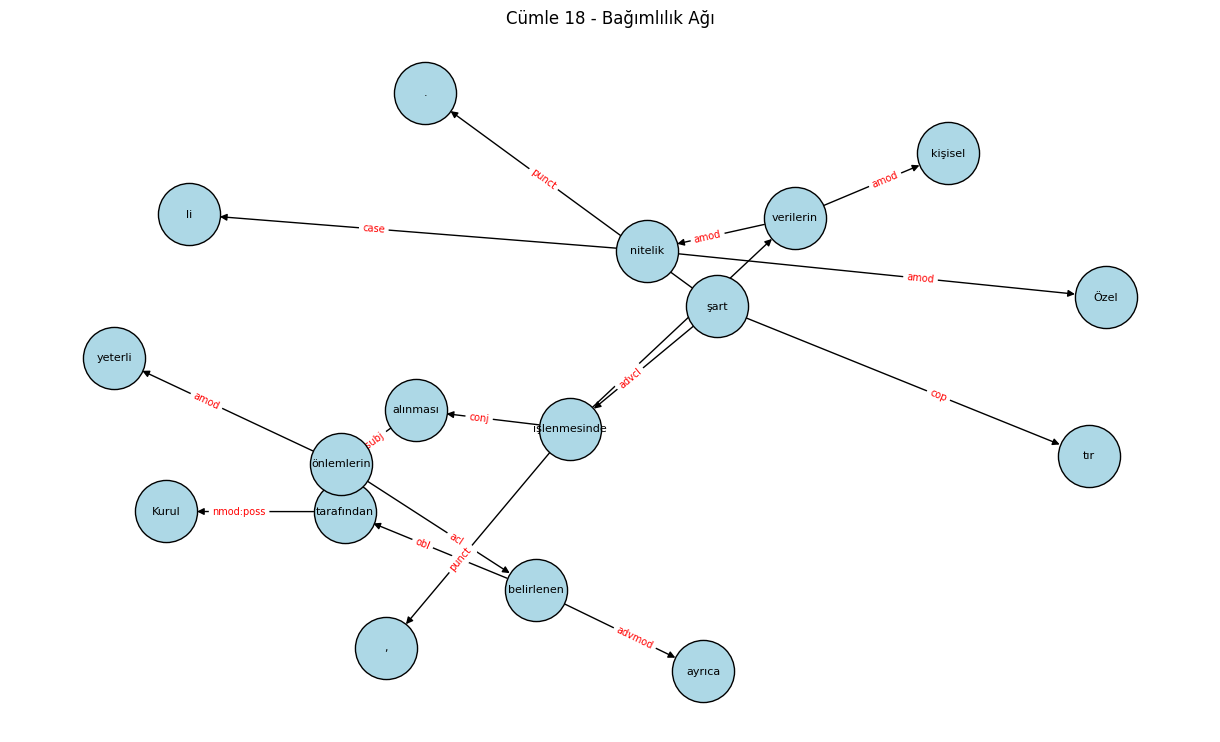

In [284]:
nlp_dep = stanza.Pipeline(
    'tr',
    processors='tokenize,pos,lemma,depparse',
    tokenize_no_ssplit=True,
    verbose=False
)

def dependency_analysis(sentence, sent_no):
    print(f"\n============ Cümle {sent_no}: {sentence} ============\n")
    doc = nlp_dep(sentence)
    records = []
    G = nx.DiGraph()

    for sent in doc.sentences:
        for word in sent.words:
            head_word = sent.words[word.head - 1].text if word.head != 0 else "ROOT"
            records.append({
                "ID": word.id,
                "Söz": word.text,
                "Lemma": word.lemma,
                "POS": word.upos,
                "Baş (head)": head_word,
                "Bağımlılık türü (deprel)": word.deprel
            })
            if word.head != 0:
                G.add_edge(head_word, word.text, label=word.deprel)
            else:
                G.add_node(word.text)

    df_dep = pd.DataFrame(records)
    display(df_dep)  # tabloyu göster

    plt.figure(figsize=(12, 7))
    pos = nx.spring_layout(G, seed=42, k=1.5, iterations=200)
    nx.draw(G,pos,with_labels=True,node_color="lightblue",node_size= 2000,font_size=8,edgecolors="black")

    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=7, label_pos=0.6 )
    plt.title(f"Cümle {sent_no} - Bağımlılık Ağı")
    plt.show()

for i, sentence in enumerate(df_sent["original_sentence"], 1):
    dependency_analysis(sentence, i)


8) Metin içerisinde NER (Named Entitiy Recognation) listelemesini yapınız.

In [285]:
nlp_ner = stanza.Pipeline("tr", processors="tokenize,ner")
doc = nlp_ner(text)
records= []
for ent in doc.ents:
    records.append({
        "Varlık": ent.text,
        "Tür": ent.type,

    })

df = pd.DataFrame(records)
print(df)

      Varlık   Tür
0  2/3/2024-  TIME


Neredeyse Hiç Adlandırılmış varlık bulamadık birde böyle deneyelim

In [286]:
ek="Semih'i Ankara'ya götüreceğim ama Semih İstanbul'a gitmek istiyor. Semih İstanbul Medeniyet Üniversitesinde Okuyor"
text_eklenmis= text+ek
doc = nlp_ner(text_eklenmis)
records= []
for ent in doc.ents:
    records.append({
        "Varlık": ent.text,
        "Tür": ent.type,

    })

df = pd.DataFrame(records)
print(df)


                                     Varlık           Tür
0                                 2/3/2024-          TIME
1                                 Ankara'ya      LOCATION
2                          Semih İstanbul'a      LOCATION
3  Semih İstanbul Medeniyet Üniversitesinde  ORGANIZATION



9) İkili ve üçlü n-gram listelemesini yapınız.


In [287]:
def show_ngrams(sentence, sent_no):
    tokens = sentence.split()
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))
    print(f"\n===== Cümle {sent_no} =====")
    print("Bigrams:", bigrams)
    print("Trigrams:", trigrams)


In [288]:
for i, sentence in enumerate(df_sent["original_sentence"], 1):
    show_ngrams(sentence, i)


===== Cümle 1 =====
Bigrams: [('Kişisel', 'Verilerin'), ('Verilerin', 'İşlenmesi'), ('İşlenmesi', 'Genel'), ('Genel', 'ilkeler'), ('ilkeler', 'MADDE'), ('MADDE', '4-'), ('4-', 'Kişisel'), ('Kişisel', 'veriler,'), ('veriler,', 'ancak'), ('ancak', 'bu'), ('bu', 'Kanunda'), ('Kanunda', 've'), ('ve', 'diğer'), ('diğer', 'kanunlarda'), ('kanunlarda', 'öngörülen'), ('öngörülen', 'usul'), ('usul', 've'), ('ve', 'esaslara'), ('esaslara', 'uygun'), ('uygun', 'olarak'), ('olarak', 'işlenebilir.')]
Trigrams: [('Kişisel', 'Verilerin', 'İşlenmesi'), ('Verilerin', 'İşlenmesi', 'Genel'), ('İşlenmesi', 'Genel', 'ilkeler'), ('Genel', 'ilkeler', 'MADDE'), ('ilkeler', 'MADDE', '4-'), ('MADDE', '4-', 'Kişisel'), ('4-', 'Kişisel', 'veriler,'), ('Kişisel', 'veriler,', 'ancak'), ('veriler,', 'ancak', 'bu'), ('ancak', 'bu', 'Kanunda'), ('bu', 'Kanunda', 've'), ('Kanunda', 've', 'diğer'), ('ve', 'diğer', 'kanunlarda'), ('diğer', 'kanunlarda', 'öngörülen'), ('kanunlarda', 'öngörülen', 'usul'), ('öngörülen', 'u

10) İkili n-gram için en çok geçen kelime grubunu yazdırınız

In [289]:
all_tokens = []
for sentence in df_sent["original_sentence"]:
    all_tokens.extend(sentence.split())


bigram_freq = Counter(list(ngrams(all_tokens,2)))
most_common_bigram, freq = bigram_freq.most_common(1)[0]

print("En çok geçen 2-gram (kelime grubu):", " ".join(most_common_bigram))
print("Frekans:", freq)



En çok geçen 2-gram (kelime grubu): için zorunlu
Frekans: 5
